# Advanced: Proximal OPE under Confounding

This notebook demonstrates a confounded bandit where standard OPE is biased
and a proximal estimator leverages proxy variables for robustness.

In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np

from crl.assumptions import AssumptionSet
from crl.assumptions_catalog import OVERLAP, SEQUENTIAL_IGNORABILITY
from crl.benchmarks.confounded_bandit import ConfoundedBandit, ConfoundedBanditConfig
from crl.confounding.proximal import (
    ProximalBanditDataset,
    ProximalBanditEstimator,
    ProximalConfig,
)
from crl.estimands.policy_value import PolicyValueEstimand
from crl.estimators.importance_sampling import ISEstimator
from crl.viz import configure_notebook_display, save_figure
from crl.viz.plots import plot_estimator_comparison

In [2]:
np.random.seed(0)
configure_notebook_display()

benchmark = ConfoundedBandit(ConfoundedBanditConfig(seed=7))
prox_data = benchmark.sample(num_samples=2_000, seed=8)
logged_data = prox_data.to_logged_dataset()
true_value = benchmark.true_policy_value(benchmark.target_policy)

estimand = PolicyValueEstimand(
    policy=benchmark.target_policy,
    discount=1.0,
    horizon=1,
    assumptions=AssumptionSet([SEQUENTIAL_IGNORABILITY, OVERLAP]),
)

is_report = ISEstimator(estimand).estimate(logged_data)
prox_config = ProximalConfig(ridge=5e-3)
prox_report = ProximalBanditEstimator(
    benchmark.target_policy, config=prox_config
).estimate(prox_data)

isinstance(prox_data, ProximalBanditDataset), prox_data.to_dict().keys()

rows = [
    {"estimator": "IS", "value": is_report.value, "ci": is_report.ci},
    {"estimator": "Proximal", "value": prox_report, "ci": None},
]

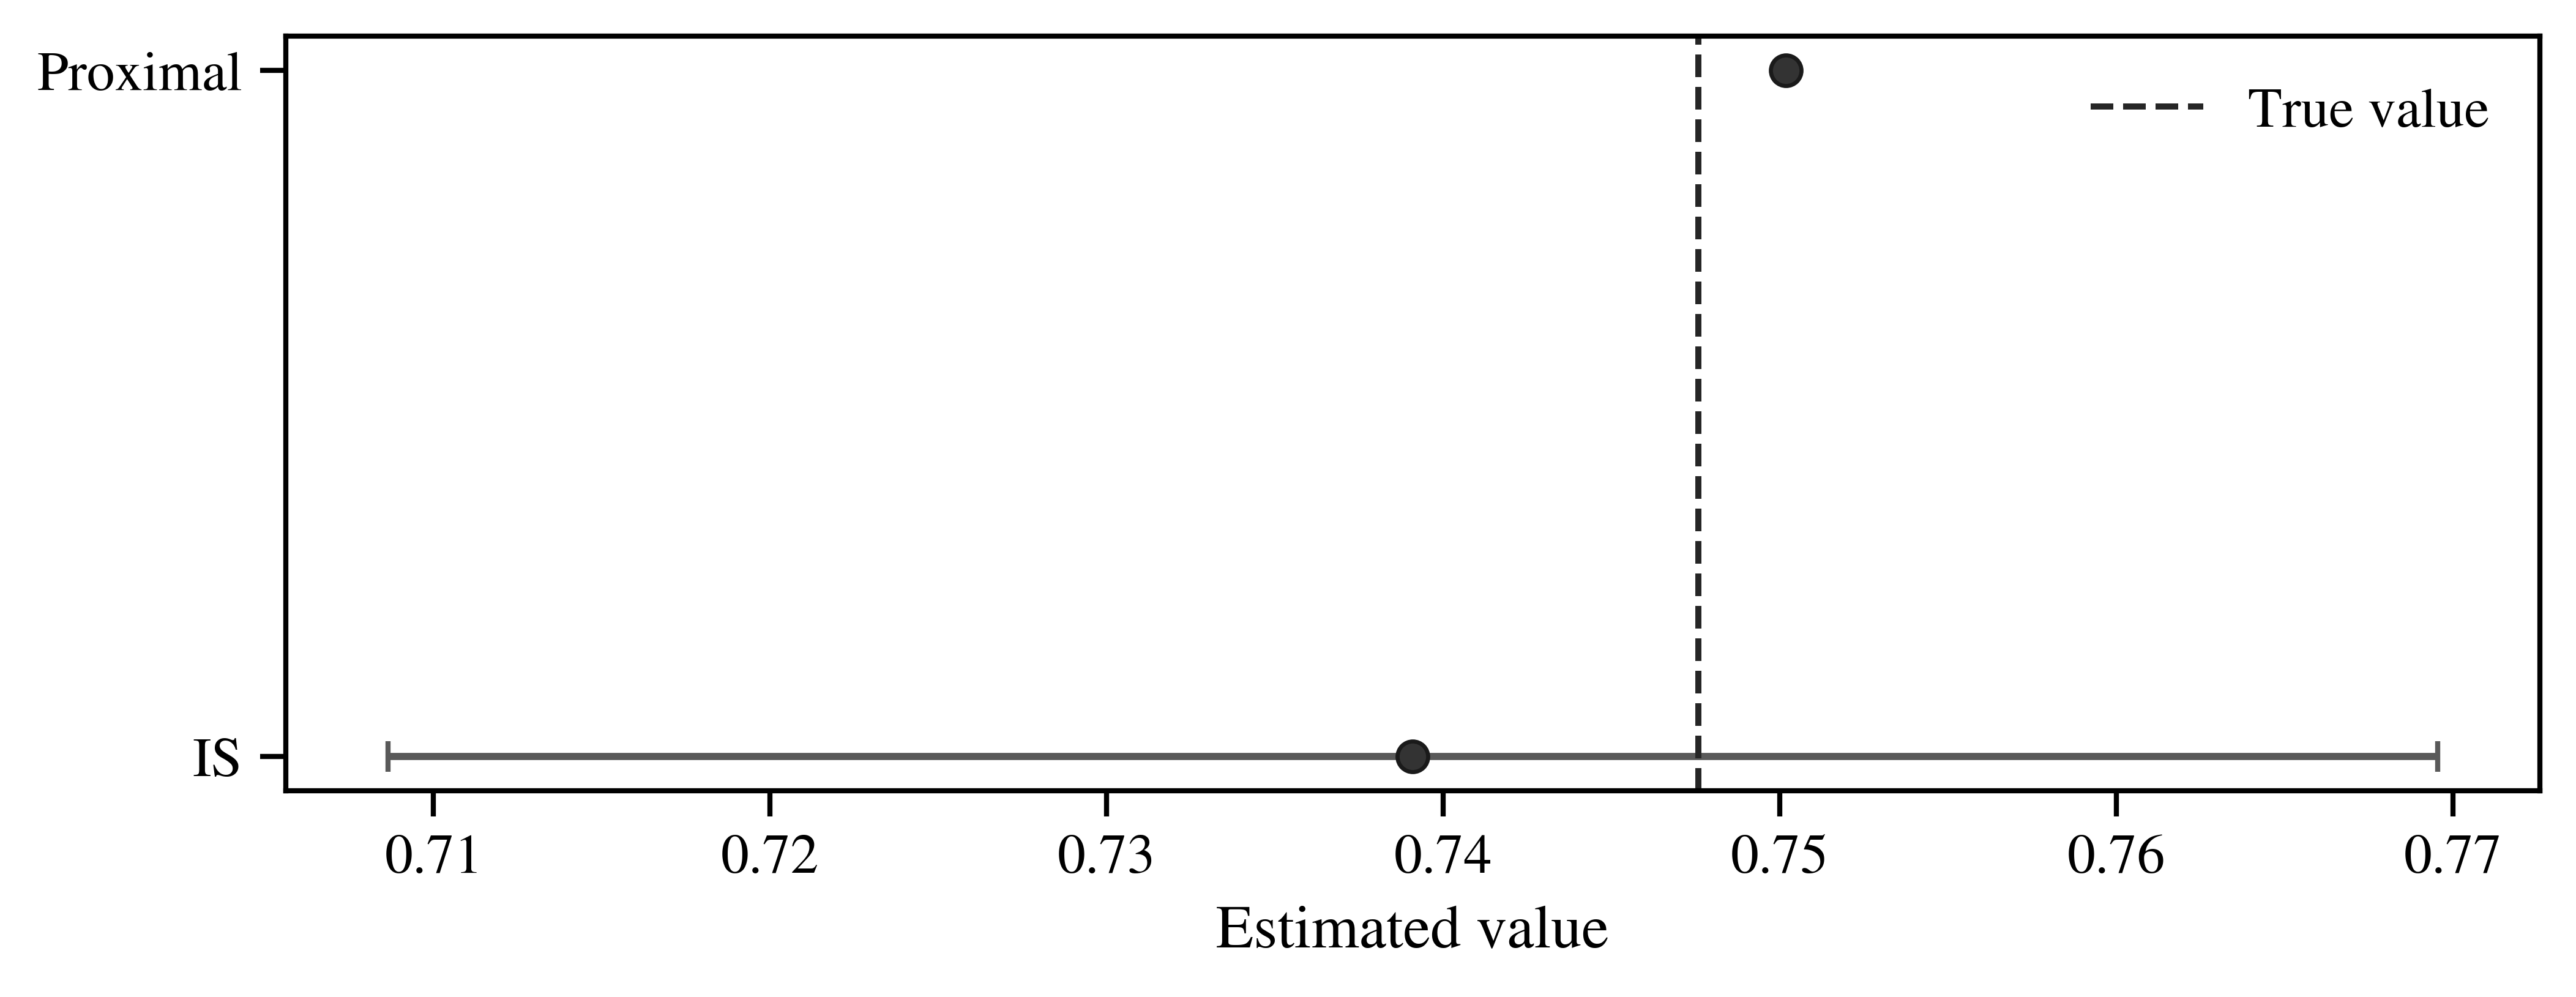

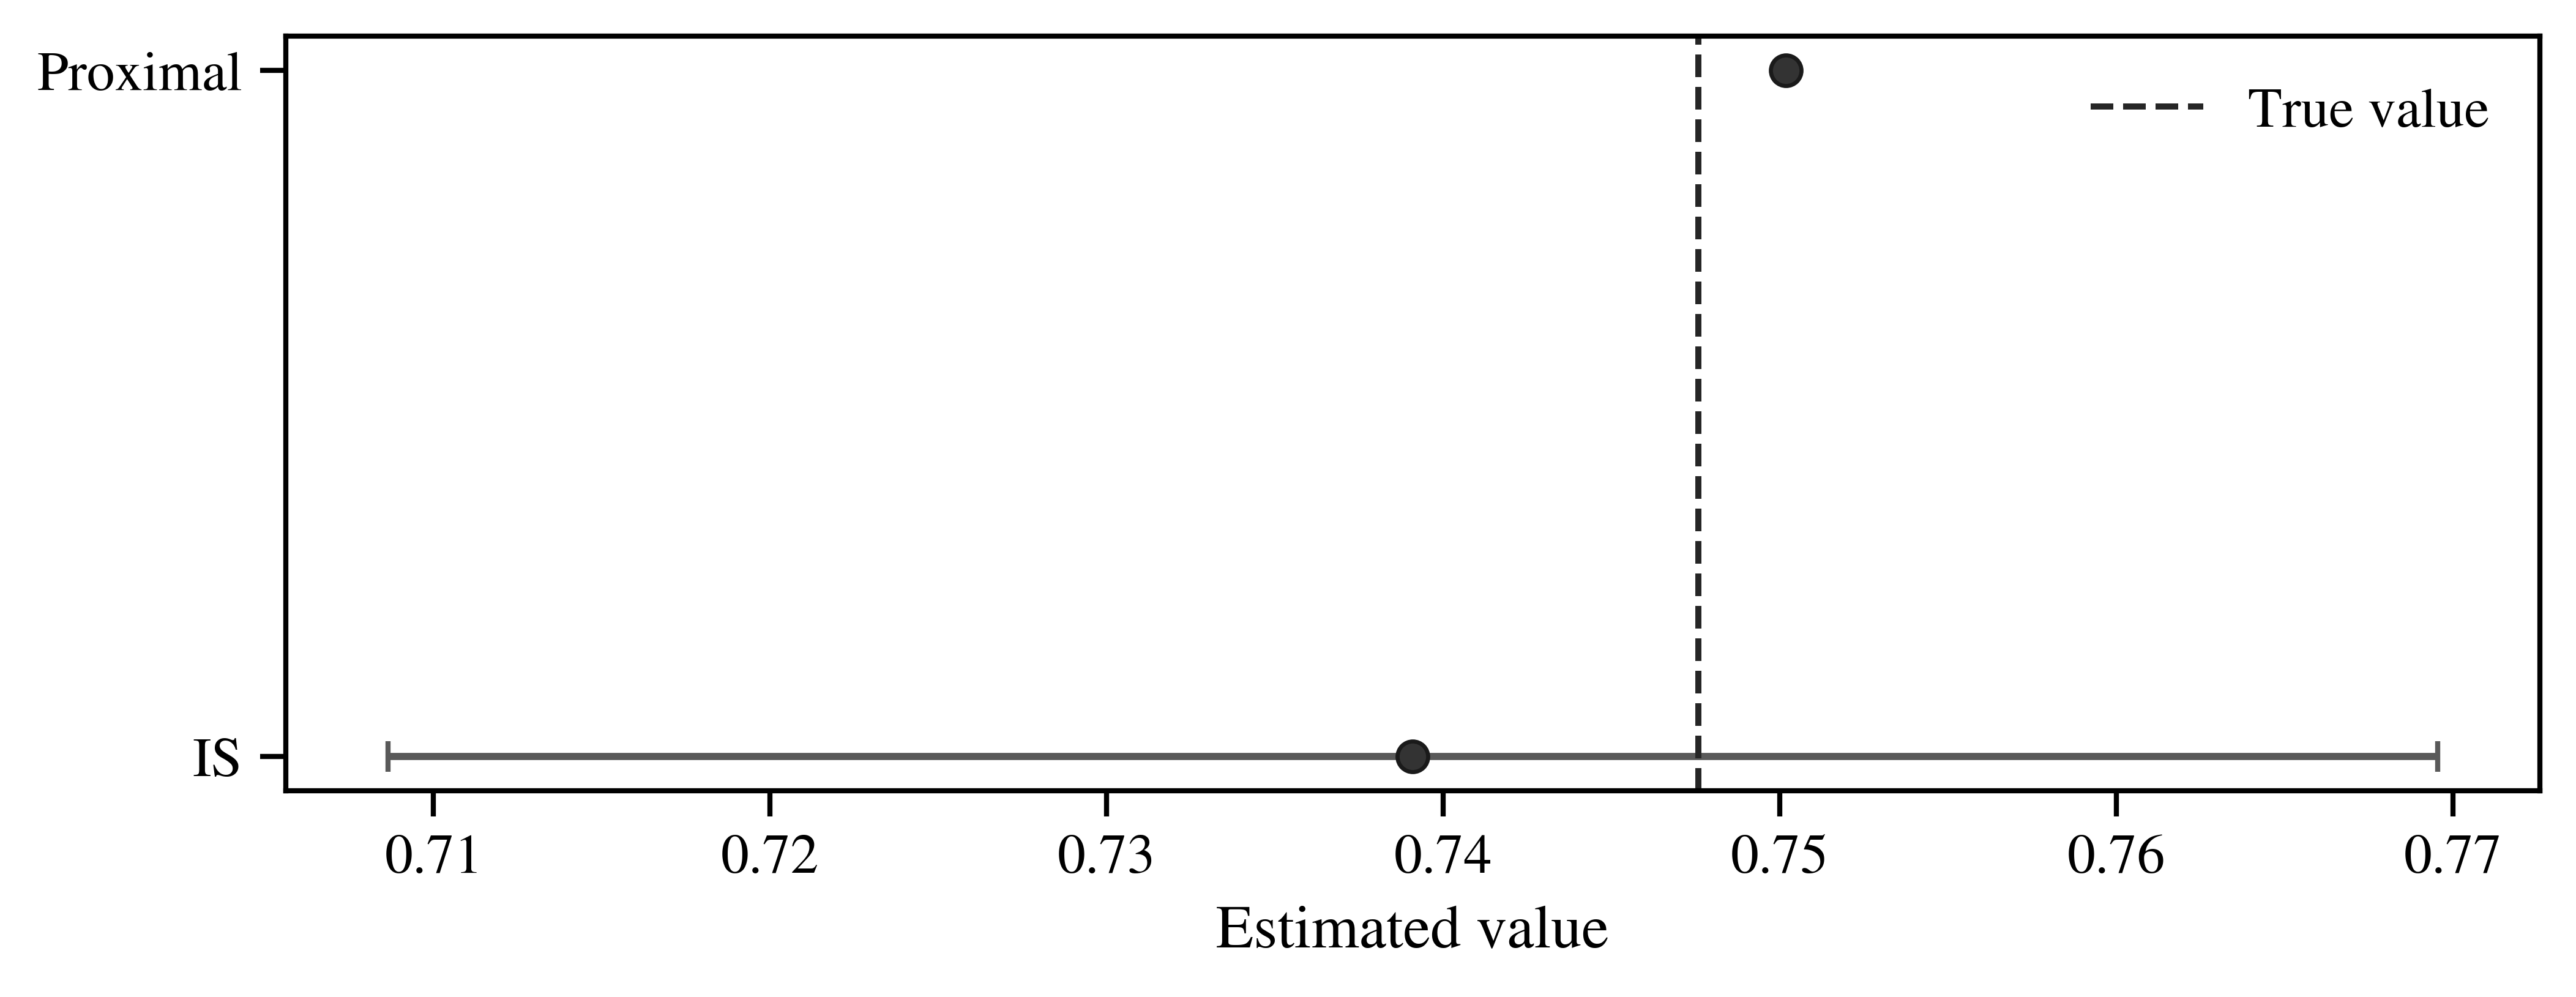

In [3]:
fig = plot_estimator_comparison(rows, truth=true_value)
fig

In [4]:
output_dir = Path("docs/assets/figures")
output_dir.mkdir(parents=True, exist_ok=True)
save_figure(fig, output_dir / "proximal_confounded_bandit")

{'pdf': 'docs/assets/figures/proximal_confounded_bandit.pdf',
 'png': 'docs/assets/figures/proximal_confounded_bandit.png'}